In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test_identity.csv
/kaggle/input/sample_submission.csv
/kaggle/input/train_identity.csv
/kaggle/input/train_transaction.csv
/kaggle/input/test_transaction.csv


### train_transaction.csv 파일과 train_identity.csv 파일 비교분석

두 파일의 공통점은 'TransactionID' 이다. 공통키 역할을 한다.

그런데 train_transaction.csv 파일의 TransactionID는 연속적인 반면에

train_identity.csv 파일의 TransactionID는 불연속적이다.

그래서 두 파일에 모두 존재하는 TransactionID를 기준으로 두 테이블을 합쳐야한다.

In [6]:
# 읽기모드로 train용 *.csv파일을 오픈한다.
train_transaction= pd.read_csv('../input/train_transaction.csv')
train_identity = pd.read_csv('../input/train_identity.csv')

# 합치기 전에 두 csv파일의 shape에 대해 알아보자.
print('train_transaction.shape: ',train_transaction.shape)
print('train_identity.shape: ',train_identity.shape)

train_transaction.shape:  (590540, 394)
train_identity.shape:  (144233, 41)


상대적으로 train_identity에 비해 

train_transaction이 더 큰 데이터를 보유하고 있음을 알 수있다.

합치기 전에 DataFrame.info() 메소드를 이용하여 

각 csv파일에 대한 정보를 탐색해본다.

In [7]:
# 읽기모드로 test용 *.csv파일을 오픈한다.
test_transaction= pd.read_csv('../input/test_transaction.csv')
test_identity= pd.read_csv('../input/test_identity.csv')

# 두 csv파일의 shape를 찍어본다.
print('test_transaction.shape: ', test_transaction.shape)
print('test_identity.shape: ', test_identity.shape)

test_transaction.shape:  (506691, 393)
test_identity.shape:  (141907, 41)


마찬가지로 test_transaction이 test_identity보다

더 많은 데이터셋을 보유하고 있다.

**test_transaction**: **506691**개의 행, 393개의 컬럼

**test_identity**   : **141907**개의 행, 41 개의 컬럼

In [8]:
# train_transaction
# train_transaction의 row의 개수 : 590540 개 / 컬럼개수: 394개
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [9]:
# train_identity
# train_identity의 row의 개수 : 144233 개 / 컬럼개수: 41개
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [10]:
# test_transaction.info()
test_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [11]:
# test_identity.info()
test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
TransactionID    141907 non-null int64
id_01            141907 non-null float64
id_02            136976 non-null float64
id_03            66481 non-null float64
id_04            66481 non-null float64
id_05            134750 non-null float64
id_06            134750 non-null float64
id_07            5059 non-null float64
id_08            5059 non-null float64
id_09            74338 non-null float64
id_10            74338 non-null float64
id_11            136778 non-null float64
id_12            141907 non-null object
id_13            130286 non-null float64
id_14            71357 non-null float64
id_15            136977 non-null object
id_16            125747 non-null object
id_17            135966 non-null float64
id_18            50875 non-null float64
id_19            135906 non-null float64
id_20            135633 non-null float64
id_21            5059 non-null float64
id_2

train_transaction 컬럼개수: 394개

test_transaction 컬럼개수: 393개

1개의 차이는 결과레이블인 **isFraud** 컬럼이다.

train_identity 컬럼개수: 41개

test_identity 컬럼개수 : 41개

In [12]:
# train_transaction과 train_identity의 공통키인 
# TransactionID의 개수를 카운트한다.
print('train_transaction의 TransactionID 개수:', \
     train_transaction['TransactionID'].count())

print('train_identity의 TransactionID 개수: ', \
     train_identity['TransactionID'].count())

train_transaction의 TransactionID 개수: 590540
train_identity의 TransactionID 개수:  144233


TransactionID 의 개수만을 세보면서 알 수 있는 것은 

각각의 csv파일의 TransactionID의 개수는 

각 csv 파일의 행(ROW)의 개수와 동일하다는 것이다.

그렇다면 train_transaction에서 

train_identity와 겹치는 TransactionID가 몇개인지 확인해보자.

동일한 방법으로 test_transaction 과test_identity와 겹치는 

TransactionID가 몇 개인지도 확인해보자.



In [13]:
print('train_transaction, train_identity 중 겹치는 TransactionID 개수\n: ',\
      np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'])))

print('test_transaction, test_identity 중 겹치는 TransactionID 개수\n: ',\
      np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'])))


train_transaction, train_identity 중 겹치는 TransactionID 개수
:  144233
test_transaction, test_identity 중 겹치는 TransactionID 개수
:  141907


#### 공통키 TransactionID를 기준으로 train(test)_transaction 와 train(test)_identity 를 합쳐본다.

In [14]:
# train_identity의 TransactionID를 기준으로 데이터셋을 합쳐보자.
train_merged = pd.merge(train_transaction, train_identity, 
                        on='TransactionID', how='right')

test_merged= pd.merge(test_transaction, test_identity,
                     on='TransactionID', how='right' )

In [15]:
# train_identity를 기준으로 merge시켜봤다. 데이터의 손실이 크겠지만.. 그래도 해보자...
train_merged.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [16]:
# train_merged 의 전체 row개수는?
print('train_merged.shape: ', train_merged.shape)

# test_merged 의 전체 row개수는?
print('test_merged.shape: ', test_merged.shape)

train_merged.shape:  (144233, 434)
test_merged.shape:  (141907, 433)


In [17]:
# train_merged의 TransactionID와 isFraud를 
# 제외한 나머지 컬럼에 대한 정보를 알아본다.
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 478.7+ MB


float64 타입: 399개 <br>
int64 타입: 4개<br>
object 타입(string) : 31개<br>

In [18]:
# train_merged의 컬럼 개수를 카운트한다.
train_merged_columns_len=len(train_merged.columns)

# TransactionID, isFraud를 제외한 나머지 컬럼의 개수를 카운트
for i in range(2, train_merged_columns_len): # 2~433
        print('train_merged[{}] 개수: {}개'.format(train_merged.columns[i],train_merged.iloc[:,i].count()))

train_merged[TransactionDT] 개수: 144233개
train_merged[TransactionAmt] 개수: 144233개
train_merged[ProductCD] 개수: 144233개
train_merged[card1] 개수: 144233개
train_merged[card2] 개수: 143331개
train_merged[card3] 개수: 144061개
train_merged[card4] 개수: 144049개
train_merged[card5] 개수: 143277개
train_merged[card6] 개수: 144055개
train_merged[addr1] 개수: 83786개
train_merged[addr2] 개수: 83786개
train_merged[dist1] 개수: 0개
train_merged[dist2] 개수: 37593개
train_merged[P_emaildomain] 개수: 130842개
train_merged[R_emaildomain] 개수: 131083개
train_merged[C1] 개수: 144233개
train_merged[C2] 개수: 144233개
train_merged[C3] 개수: 144233개
train_merged[C4] 개수: 144233개
train_merged[C5] 개수: 144233개
train_merged[C6] 개수: 144233개
train_merged[C7] 개수: 144233개
train_merged[C8] 개수: 144233개
train_merged[C9] 개수: 144233개
train_merged[C10] 개수: 144233개
train_merged[C11] 개수: 144233개
train_merged[C12] 개수: 144233개
train_merged[C13] 개수: 144233개
train_merged[C14] 개수: 144233개
train_merged[D1] 개수: 144015개
train_merged[D2] 개수: 31116개
train_merged[D3] 개수: 29

train_merged[id_11] 개수: 140978개
train_merged[id_12] 개수: 144233개
train_merged[id_13] 개수: 127320개
train_merged[id_14] 개수: 80044개
train_merged[id_15] 개수: 140985개
train_merged[id_16] 개수: 129340개
train_merged[id_17] 개수: 139369개
train_merged[id_18] 개수: 45113개
train_merged[id_19] 개수: 139318개
train_merged[id_20] 개수: 139261개
train_merged[id_21] 개수: 5159개
train_merged[id_22] 개수: 5169개
train_merged[id_23] 개수: 5169개
train_merged[id_24] 개수: 4747개
train_merged[id_25] 개수: 5132개
train_merged[id_26] 개수: 5163개
train_merged[id_27] 개수: 5169개
train_merged[id_28] 개수: 140978개
train_merged[id_29] 개수: 140978개
train_merged[id_30] 개수: 77565개
train_merged[id_31] 개수: 140282개
train_merged[id_32] 개수: 77586개
train_merged[id_33] 개수: 73289개
train_merged[id_34] 개수: 77805개
train_merged[id_35] 개수: 140985개
train_merged[id_36] 개수: 140985개
train_merged[id_37] 개수: 140985개
train_merged[id_38] 개수: 140985개
train_merged[DeviceType] 개수: 140810개
train_merged[DeviceInfo] 개수: 118666개


# EDA

## Target 분석: isFraud 시각화

#### train_merge 에서 isFraud의 분포를 그려보자.

isFraud=0 => No-Fraud<br>
isFraud=1 => Fraud<br>

train_merge 에서<br>
isFraud=0 인 데이터의 개수는 132915개<br>
isFraud=1 인 데이터의 개수는 11318개 이다.<br>

In [22]:
isFraud_vals=train_merged['isFraud'].value_counts()
isFraud_vals

0    132915
1     11318
Name: isFraud, dtype: int64

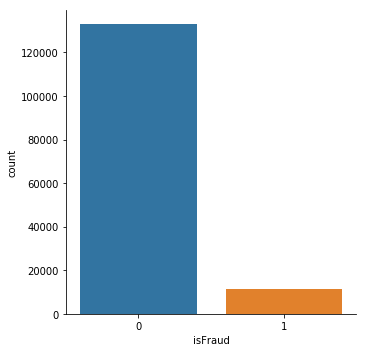

In [34]:
sns.catplot(data=train_merged, 
            x="isFraud",
            kind='count',
           )
# 정말 거짓인 데이터들이 많다.

## TransactionAmt 를 분석해보자

train_merged['TransactionAmt'] 값을 분석해보면<br>
최솟값: 0.251<br>
최댓값: 1800<br>
평균값: 83.554533<br>

In [39]:
train_merged['TransactionAmt'].describe()

count    144233.000000
mean         83.554533
std          99.850258
min           0.251000
25%          25.453000
50%          50.000000
75%         100.000000
max        1800.000000
Name: TransactionAmt, dtype: float64

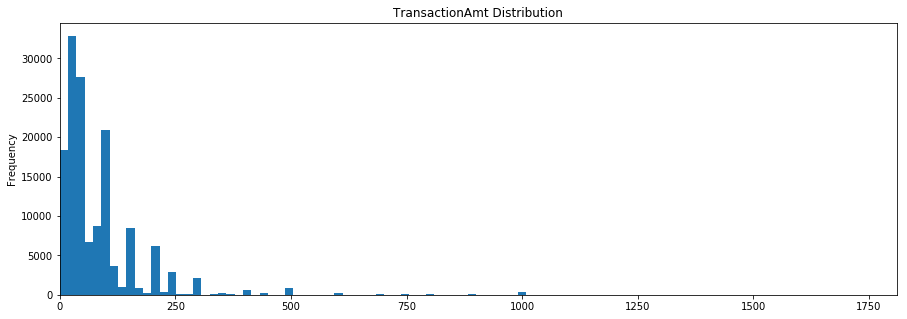

In [50]:
# 그냥 TransactionAmt 그대로 그렸더니.. 한쪽으로 치우져진다.
train_merged['TransactionAmt'].plot(
    figsize=(15,5),
    kind='hist',
    title='TransactionAmt Distribution',
    bins=100,
    xlim=(0 , max(train_merged['TransactionAmt'])+10)
)
plt.show()

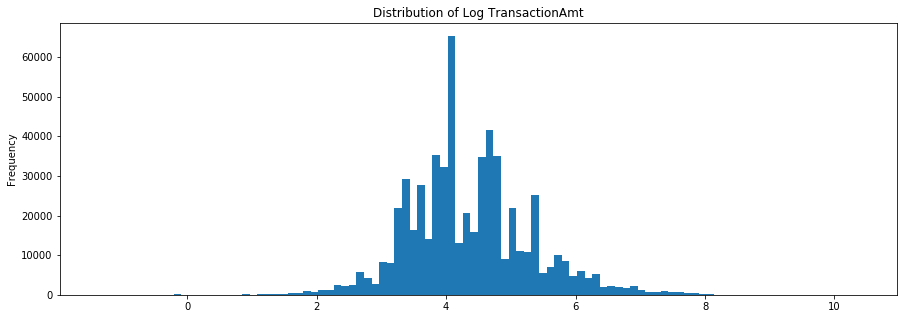

In [47]:
# 그래서 log함수를 취했다.
train_transaction['TransactionAmt'].apply(np.log).\
plot(
    kind='hist',
    bins=100,
    figsize=(15,5),
    title='Distribution of Log TransactionAmt'
)
plt.show()